In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x1030ba2e8>,
 'week2': <src.game.Game at 0x1030c8f28>,
 'week3': <src.game.Game at 0x1030e7cf8>,
 'week4': <src.game.Game at 0x103de3b00>,
 'week5': <src.game.Game at 0x103df9a58>,
 'week6': <src.game.Game at 0x11638d7b8>,
 'week7': <src.game.Game at 0x116396f60>,
 'week8': <src.game.Game at 0x1163ba7b8>,
 'week10': <src.game.Game at 0x1163df5c0>,
 'week11': <src.game.Game at 0x1163f2b00>,
 'week12': <src.game.Game at 0x116403f60>,
 'week13': <src.game.Game at 0x116425278>,
 'week14': <src.game.Game at 0x116436518>,
 'week15': <src.game.Game at 0x117252320>,
 'week16': <src.game.Game at 0x11725b860>,
 'week17': <src.game.Game at 0x11727e7b8>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [40]:
play_number = 10

In [41]:
play = game.plays[play_number - 1]

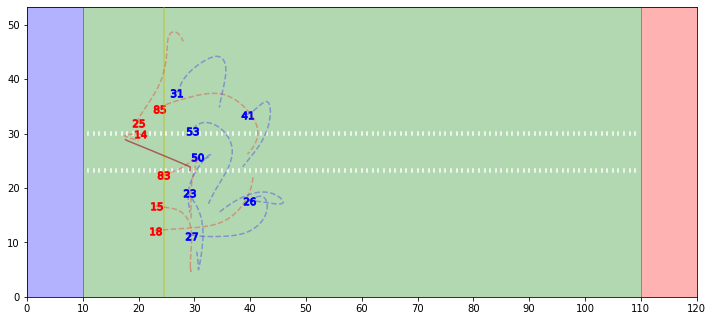

In [42]:
play.plot_play(markers='number')

In [43]:
corners = play.return_players_by_position('CB')

In [44]:
for cb in corners:
    print(f'{cb.name} - {cb.number} - {cb.position}')

Quincy Wilson - 31 - CB
Nate Hairston - 27 - CB
Kenny Moore II - 23 - CB


In [45]:
receivers = play.return_players_by_position('WR') + play.return_players_by_position('TE')

In [46]:
for r in receivers:
    print(f'{r.name} - {r.number} - {r.position}')

A.J. Green - 18 - WR
Tyler Boyd - 83 - WR
John Ross - 15 - WR
Tyler Eifert - 85 - TE


In [47]:
start = play.events['ball_snap']
for cb in corners:
    print(f'{cb.name} - {cb.number} - ({cb.distance_from_center(start):.1f})')

Quincy Wilson - 31 - (11.1)
Nate Hairston - 27 - (-15.3)
Kenny Moore II - 23 - (-7.6)


In [48]:
start = play.events['ball_snap']
for r in receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

A.J. Green - 18 - (-14.5)
Tyler Boyd - 83 - (-4.3)
John Ross - 15 - (-10.0)
Tyler Eifert - 85 - (8.0)


In [49]:
top_corners = []
bottom_corners = []
for cb in corners:
    if cb.distance_from_center(start) > 0:
        top_corners.append(cb)
    else:
        bottom_corners.append(cb)

In [50]:
uncovered_top_receivers = []
uncovered_bottom_receivers = []
for r in receivers:
    if r.distance_from_center(start) > 0:
        uncovered_top_receivers.append(r)
    else:
        uncovered_bottom_receivers.append(r)

In [51]:
start = play.events['ball_snap']

top_corners.sort(reverse=True, key=lambda player: player.distance_from_center(start))
bottom_corners.sort(key=lambda player: player.distance_from_center(start))

uncovered_top_receivers.sort(reverse=True, key=lambda player: player.distance_from_center(start))
uncovered_bottom_receivers.sort(key=lambda player: player.distance_from_center(start))

In [52]:
for cb in top_corners:
    print(f'{cb.name} - {cb.number} - ({cb.distance_from_center(start):.1f})')

Quincy Wilson - 31 - (11.1)


In [53]:
for cb in bottom_corners:
    print(f'{cb.name} - {cb.number} - ({cb.distance_from_center(start):.1f})')

Nate Hairston - 27 - (-15.3)
Kenny Moore II - 23 - (-7.6)


In [54]:
for r in uncovered_top_receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

Tyler Eifert - 85 - (8.0)


In [55]:
for r in uncovered_bottom_receivers:
    print(f'{r.name} - {r.number} - ({r.distance_from_center(start):.1f})')

A.J. Green - 18 - (-14.5)
John Ross - 15 - (-10.0)
Tyler Boyd - 83 - (-4.3)


In [56]:
horizontal_cover_threshold = 2.0

In [57]:
for cb in top_corners:
    print(f'{cb.name} ({cb.number})')
    for r in uncovered_top_receivers:
        delta = cb.distance_from_center(start) - r.distance_from_center(start)
        print(f'  Distance between {cb.name} and {r.name} = {delta:.1f}')
        if abs(delta) < horizontal_cover_threshold:
            print(f'    {cb.name} ({cb.number}) covering {r.name} ({r.number})')
            print(f'    Distance from Line: {cb.distance_from_line(start):.1f}')
            cb.locks.append(r)
            uncovered_top_receivers.remove(r)

Quincy Wilson (31)
  Distance between Quincy Wilson and Tyler Eifert = 3.1


In [58]:
for cb in bottom_corners:
    print(f'{cb.name} ({cb.number})')
    for r in uncovered_bottom_receivers:
        delta = cb.distance_from_center(start) - r.distance_from_center(start)
        print(f'  Distance between {cb.name} and {r.name} = {delta:.1f}')
        if abs(delta) < horizontal_cover_threshold:
            print(f'    {cb.name} ({cb.number}) covering {r.name} ({r.number})')
            print(f'    Distance from Line: {cb.distance_from_line(start):.1f}')
            cb.locks.append(r)
            uncovered_bottom_receivers.remove(r)

Nate Hairston (27)
  Distance between Nate Hairston and A.J. Green = -0.8
    Nate Hairston (27) covering A.J. Green (18)
    Distance from Line: 4.4
  Distance between Nate Hairston and Tyler Boyd = -11.0
Kenny Moore II (23)
  Distance between Kenny Moore II and John Ross = 2.5
  Distance between Kenny Moore II and Tyler Boyd = -3.3


In [59]:
def plot_play_frame(self, index, scale=1, markers=None, show=True, output=False, target_directory=''):
    if isinstance(index,str):
        index = self.events[index] - 1

    fig,ax = self.build_field(scale=scale)

    ax.axvline(self.line_of_scrimmage,color='y',alpha=.5,zorder=3)

    for player in self.players['offense'].values():
        marker, s = self.set_player_marker(player, markers, scale)

        pos = player.tracking_data.loc[index]
        ax.scatter(pos['x'],pos['y'],color='r',marker=marker,zorder=3,s=s)

    for player in self.players['defense'].values():
        marker, s = self.set_player_marker(player, markers, scale)

        pos = player.tracking_data.loc[index]
        ax.scatter(pos['x'],pos['y'],color='b',marker=marker,zorder=3,s=s)

    ax.scatter(self.fb_tracking['x'].values[index],
               self.fb_tracking['y'].values[index],
               color='brown',marker='d',zorder=3)
    
    for player in self.players['defense'].values():
        if len(player.locks) == 1:
            print(player.location(index))
            d_loc = player.location(index)
            o_loc = player.locks[0].location(index)
            d = np.absolute(d_loc - o_loc)
            min_x = min(player.location(start)[0] , player.locks[0].location(start)[0])
            min_y =  min(player.location(start)[1] , player.locks[0].location(start)[1])
            bx = min_x - 2
            by = min_y - 2
            w = d[0] + 4
            h = d[1] + 4
            ax.add_patch(mpatches.Rectangle((bx,by), width=w, height=h, ec='k',fc='none'))

    title = f'Play Frame - {index+1}'
    ax.set_title(title,fontsize=18)

    play_events = self.fb_tracking['event'].values
    _event = play_events[index]
    if play_events[index] != 'None':
        ax.set_xlabel(f'Event: {_event.replace("_"," ").title()}',fontsize=16)

    plt.show()

[28.94       11.34333333]


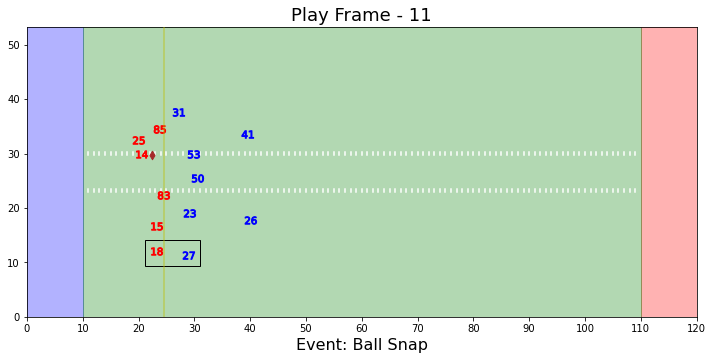

In [60]:
plot_play_frame(play, index='ball_snap',markers='number')